In [1]:
import pandas as pd
import nltk
import re
import spacy
from spacy import displacy
# Download NLTK resources
# nltk.download('stopwords')
# nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import logging
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score

import joblib



In [12]:
df = pd.read_csv('Nlp/jupyter_notebook/BIG_DATASET.csv')
stop_words = set(stopwords.words('english'))
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
nlp = spacy.load("en_core_web_lg")

In [ ]:
#Text preprocessing and lemmatization

def clean_text(text):
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'\W+', ' ', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text


def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]


df['text'] = df['text'].apply(clean_text)

df['tokens'] = df['text'].apply(word_tokenize)

df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

df['tokens'] = df['tokens'].apply(lemmatize_tokens)

#print(df.head())


In [ ]:
#Convert tokens to a spaCy document
for tokens in df['tokens']:

    doc = nlp(" ".join(tokens))
    
  

In [6]:
#Morphological Analysis and Word Information
def token_info(doc):
    for token in doc:

        print(token.text, token.pos_, token.tag_, token.dep_)
    
token_info(doc)

hr NOUN NN nmod
executive NOUN NN nmod
professional ADJ JJ amod
summary NOUN NN nsubj
forward ADV RB advmod
thinking NOUN NN acl
hr NOUN NN compound
generalist NOUN NN dobj
highly ADV RB advmod
effective ADJ JJ amod
adapt VERB VBP csubj
evolve NOUN NN compound
market NOUN NN compound
plan NOUN NN dobj
need VERB VBP conj
associate ADJ JJ amod
company NOUN NN compound
expansion NOUN NN compound
skill NOUN NN nmod
new ADJ JJ amod
employee NOUN NN compound
orientation NOUN NN compound
compensation NOUN NN compound
benefit NOUN NN nmod
termination NOUN NN compound
procedure NOUN NN nmod
interpersonal ADJ JJ amod
skill NOUN NN compound
depth NOUN NN nmod
knowledge NOUN NN nmod
hr NOUN NN nmod
compliance NOUN NN nmod
good ADJ JJ amod
communication NOUN NN compound
skill NOUN NN compound
project NOUN NN compound
management NOUN NN nmod
fast PROPN NNP amod
learner NOUN NN nmod
ms PROPN NNP nmod
office PROPN NNP nmod
proficient ADJ JJ amod
flexibility NOUN NN compound
knowledgeable ADJ JJ amod
h

In [7]:

#Named Entities View
def entities(doc):
    for ent in doc.ents:
        print(ent.text, ent.label_)

entities(doc)
displacy.render(doc, style="ent", jupyter=True)

gpa high school computer ORG
gpa ORG
indian NORP
mar apr month DATE
indian NORP
feb mar month DATE
leyland corporate office ORG
year month DATE
dr kamakshi PERSON
memorial hospital pvt ltd nov sep ORG
epf ORG
sop hr TIME
kpi kra ORG
pmi ORG
crescent business school ORG
isbr business school active ORG
hrd club ORG
quarterly DATE
tennikoit NORP
english NORP
hindi java PERSON
microsoft office sql ORG


In [8]:

def vectors(doc):
    for token in doc:
        word_vector = token.vector
        print(token.text, word_vector)

vectors(doc)

hr [ 4.077    -0.35278  -6.1479   -3.9098   -1.3213   -5.0945   -1.1431
  1.5222    1.6222   -7.083    -2.1258   -0.32806  -1.3234   -9.4946
 -2.3907   -3.6707    5.7289    3.4829   -9.705     1.5037   -0.87211
 -0.8476   -1.2486    4.6316   -7.7391    1.0344   -8.9509    4.286
 -0.23899  -6.6008    0.61759  -0.59264   0.64385  -0.88657   5.9054
  1.6542    1.432     0.080414  7.5517   -1.5156   -8.1204    4.2718
  3.2596    0.44822  -6.8582    1.488     0.42216   1.5863    3.7905
 -6.9578    2.8898    5.5585   -2.8581    1.3117    1.3091    2.2698
  2.1632    1.5244    3.7662    6.8984   -2.305    -2.4021   -9.8919
 -6.5697   -8.3059    4.2464    0.68605   4.6255    0.89582   0.87975
 -0.32931  -1.8485    1.1476   -3.3355   -1.8875   -0.40408  -2.0359
 -7.8099    2.6527    0.78742   4.4549   -3.1302    0.68918   2.2643
 -1.3868    4.4015    0.76729  -2.9109   -0.63211  -2.3077   -0.94959
  6.9517    7.2237    1.4697   -4.4422    6.2403    0.47217   4.7947
  3.0898   -3.9816    8.5664 

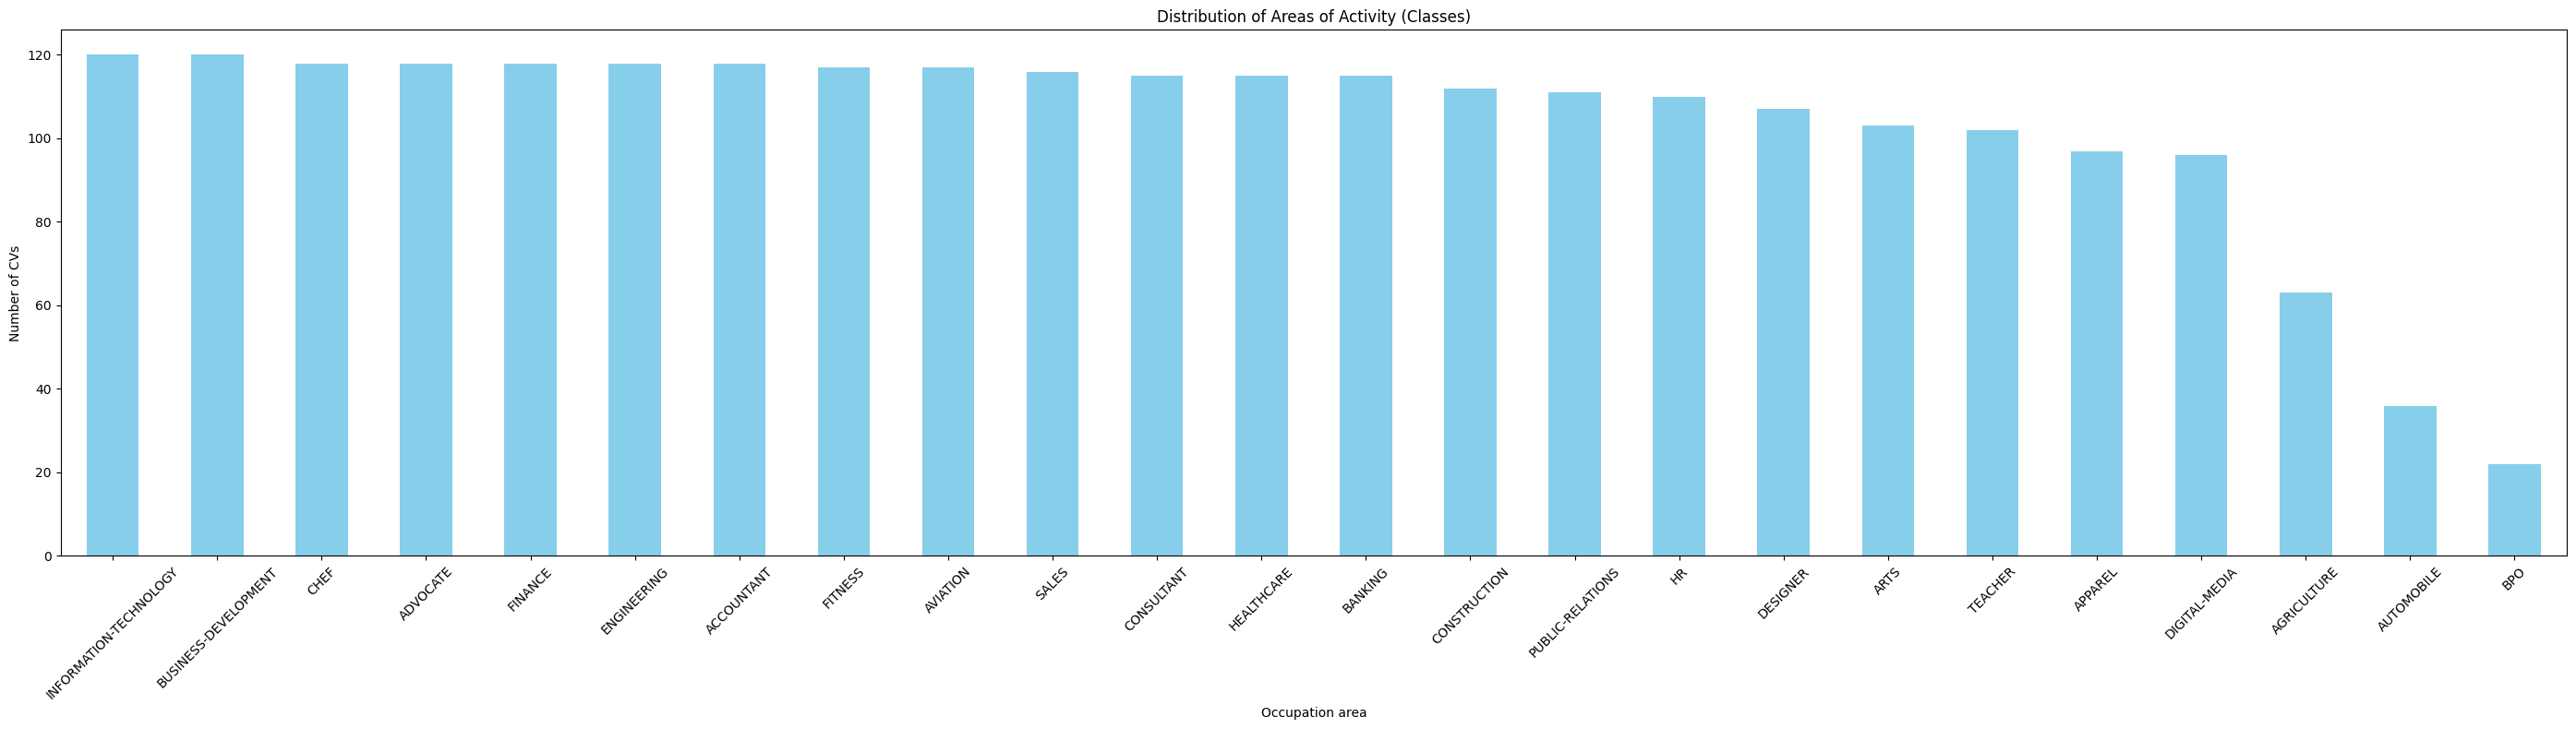

In [40]:

contagem_classes = df['class'].value_counts()

# Plot the bar chart
plt.figure(figsize=(28, 8))
contagem_classes.plot(kind='bar', color='skyblue')
plt.title('Distribution of Areas of Activity (Classes)')
plt.xlabel('Occupation area')
plt.ylabel('Number of CVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:


def train_model(df):
  
    vectorizer = TfidfVectorizer()


    X = vectorizer.fit_transform(df['tokens'])

    
    X_training, X_test, y_training, y_test = train_test_split(X, df['class'], test_size=0.2, random_state=42)

  
    model = LogisticRegression()
    model.fit(X_training, y_training)

 
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    return model, vectorizer, accuracy

# Train the model
model, vectorizer, accuracy = train_model(df)


print("Model Accuracy:", accuracy)


Model Accuracy: 0.581646423751687


In [ ]:

def train_model2(df):
    
    vectorizer = TfidfVectorizer()

    X = vectorizer.fit_transform(df['tokens'])
    y = df['class']  

   
    model = LogisticRegression()

 
    scores = cross_val_score(model, X, y, cv=5)  

    return model, scores.mean()


model, Accuracy = train_model2(df)

print("model accuracy:", Accuracy)

In [ ]:
def train(df):
    X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['class_number'], test_size=0.1, random_state=None)
    vectorizer = CountVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier()
    clf.fit(X_train_vec, y_train)
    y_pred = clf.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    return clf, vectorizer, accuracy


clf,vectorizer,accuracy_model3=train(df)
print("model accuracy:", accuracy_model3)

In [ ]:

# joblib.dump(clf, 'model.pkl')
# joblib.dump(vectorizer, 'vectorizer.pkl')